<a href="https://colab.research.google.com/github/SoYeoni621/mulcam/blob/master/0426_init.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 패키지들 설치


In [4]:
!pip install bertopic

     |████████████████████████████████| 57 kB 2.9 MB/s 
     |████████████████████████████████| 79 kB 6.9 MB/s 
     |████████████████████████████████| 88 kB 6.6 MB/s 
     |████████████████████████████████| 5.2 MB 44.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.0 MB 27.0 MB/s 
     |████████████████████████████████| 1.2 MB 44.1 MB/s 
     |████████████████████████████████| 77 kB 6.9 MB/s 
     |████████████████████████████████| 636 kB 43.5 MB/s 
     |████████████████████████████████| 6.6 MB 37.0 MB/s 
     |████████████████████████████████| 895 kB 45.1 MB/s 
     |████████████████████████████████| 1.1 MB 42.1 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330780 sha256=04cab21e9815a3eb55dd40b42262519c7a33640dc3310606fae7dac7b6272763
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef

In [3]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-04-26 04:13:44--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-04-26 04:13:44--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc0ec45e0141d428a42060bef08.dl.dropboxusercontent.com/cd/0/get/BkFkWrzsDuwBmTRIP8L9Uti3v87irXlq-5LnHWMACKDUczy5gIhr2alSw1B0ib8ZjjRnfWmNojoa5Yg3a5vrPqa9BXam61XPbjvUN5FEaQwi6zi3VnoiJGeEKpHis4swYtcLcNZ4HNCKizQHykckWqDIeH-zBlVtjSDQYd3veMNOcn-i39LccNc3Ge8Bzs0o-VM/file?dl=1# [following]
--2022-04-26 04:13:44--  https://ucc0ec45e0141d428a42060bef08.dl.dropboxusercontent.com/cd/0/get/

In [71]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=9cf2072dc5bc6cbbeb27419acf298e9bd1648a73a046a916ffdab40b320c41c1
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [2]:
!pip install --upgrade mlxtend

     |████████████████████████████████| 1.3 MB 5.7 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [72]:
!pip install sentence_transformers

In [5]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 448 kB 42.7 MB/s 


In [74]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
import math

from torch.utils.data import DataLoader
from sentence_transformers import SentenceTransformer,  SentencesDataset, LoggingHandler, losses, util, InputExample, models
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
import logging

# 6월 기사(주가 상승 달)

In [6]:
df = pd.read_excel('/content/drive/MyDrive/프로젝트/naver dataset(21-01~22-03/네이버_210601~210630 테스트 데이터.xlsx')

In [7]:
train_batch_size = 16
num_epochs = 4
model_save_path = '/content/drive/MyDrive/프로젝트/output/kpfSBERT_nli'

In [8]:
model = SentenceTransformer(model_save_path)

In [9]:
corpus = []
for i in range(len(df)):
    sent = df['content'][i]
    corpus.append(sent)

In [10]:
# 3개로 클러스터링
model_path = model_save_path

model = SentenceTransformer(model_path)

corpus_embeddings = model.encode(corpus)

# Then, we perform k-means clustering using sklearn:
from sklearn.cluster import KMeans

num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
["지분 투자 단행웹툰·웹소설 원작 오리지널 콘텐츠 만들 듯양지을·이명한 티빙 대표가 31일 서울 마포구 상암동 CJ ENM 센터에서 열린 기자 간담회 '비전 스트림'에서 미래 성장 전략을 발표하고 있다. /CJ ENM 제공        2023년까지 국내 1위 온라인 동영상 서비스 플랫폼이 되겠다고 선언한 티빙이 네이버의 지원을 받아 성장 속도를 높인다.티빙은 30일 “네이버가 티빙에 대한 지분 투자를 단행해 사업 협력 체제를 공고히 했다”라며 “향후 양사가 티빙 성장을 위한 협력을 강화할 계획이다”라고 밝혔다.양사의 협력은 네이버 웹툰·웹소설 등 콘텐츠를 티빙 오리지널 콘텐츠로 제작하는 등의 방식으로 이뤄질 것으로 보인다. 티빙은 “네이버의 투자는 OTT 성공의 핵심 열쇠라고 할 수 있는 오리지널 콘텐츠에 대한 투자를 가속화하기 위해 이뤄졌다”라며 “콘텐츠 기획·제작 역량을 가진  CJ ENM과 웹툰·웹소설 등 다양한 콘텐츠 지적재산을 가진 네이버의 시너지를 극대화하겠다”고 설명했다.네이버는 지난해 10월 티빙의 모회사 CJ ENM과의 지분 맞교환을 통해 협력 관계를 이어왔다. 지난 3월부터는 네이버의 유료 구독 서비스인 ‘네이버플러스 멤버십’ 가입자에게 티빙 무료 이용 혜택을 주고 있다.티빙은 2023년까지 넷플릭스, 웨이브를 꺾고 국내 1위 OTT 플랫폼으로 거듭나겠다는 목표로, 그때까지 100여편의 오리지널 콘텐츠를 제작하고 800만명의 유료 가입자를 확보하기로 했다. 내년엔 미국, 일본, 동남아 등 해외 진출도 시작한다.", '양사,\xa0보건복지부-한국보건의료정보원\xa0MOU“앱으로\xa0진료,\xa0건강검진,\xa0예방접종\xa0이력\xa0확인”   네이버와 카카오는 6월30일 보건복지부, 한국보건의료정보원과 ‘나의건강기록’ 애플리케이션 편의성 개선 및 서비스 활성화를 위한 업무협약을 체결했다고 밝혔다.   이용자는 ‘나의건강기록’ 앱을 통해 공공기관에서 보유 중인 개인건강정보를 조회, 저장, 활용할 수 있다. 또 △진료이력

In [11]:
cluster_label = clustering_model.labels_

In [12]:
df['Cluster_label'] = cluster_label

In [13]:
df

title           paper  \
0                            ‘1위 OTT’ 노리는 티빙…네이버가 지원한다            조선비즈   
1                '네이버 직원 사망' 이해진 "제 부족함·잘못 크다" 구성원에 사과            부산일보   
2                     이해진 네이버 창업자 "직원 극단적 선택, 제 잘못 크다"      MoneyToday   
3                           네이버-카카오 인증서로 ‘나의건강기록’ 확인한다  financial news   
4          네이버, 티빙(TVING)에 400억 지분투자…2023년 800만 가입자 목표          edaily   
..                                                 ...             ...   
852                     카카오 첫 시총 3위 마감…7년만에 네이버 추월(종합)            연합뉴스   
853                          코스피 역대 최고치…카카오·네이버 이틀째 약세             MBC   
854            네이버, 안드로이드 오토 출시 무기한 연기…“직원 극단적 선택 후폭풍”            조선비즈   
855         네이버, AI '클로바 포캐스트'로 물류 혁신…"딥러닝 접목해 기술 고도화"             뉴스1   
856  "지금이 삼성전자 담을 적기"…카카오 네이버 '씽씽' 외면받는 반도체 비중 늘려야 ...            매경닷컴   

            date                                                url  \
0    2021.06.30.  https://news.naver.com/main/read.naver?mode=LS...   
1    2021.06.30.  https://news.naver.com/main/read.naver?mode=LS...   
2    2021.06.30.  https://news.naver.com/main/read.naver?mode=LS...   
3    2021.06.30.  https://news.naver.com/main/read.naver?mode=LS...   
4    2021.06.30.  https://news.naver.com/main/read.naver?mode=LS...   
..           ...                                                ...   
852  2021.06.15.  https://news.naver.com/main/read.naver?mode=LS...   
853  2021.06.25.  https://news.naver.com/main/read.naver?mode=LS...   
854  2021.06.23.  https://news.naver.com/main/read.naver?mode=LS...   
855  2021.06.22.  https://news.naver.com/main/read.naver?mode=LS...   
856  2021.06.24.  https://news.naver.com/main/read.naver?mode=LS...   

                                               content  Cluster_label  
0    지분 투자 단행웹툰·웹소설 원작 오리지널 콘텐츠 만들 듯양지을·이명한 티빙 대표가 ...              0  
1    네이버 창업자인 이해진 글로벌투자책임자. 연합뉴스지난달 네이버 본사 직원이 극단적 ...              1  
2    이해진 네이버 글로벌투자책임자 /사진=뉴스1네이버 창업자인 이해진 글로벌투자책임자가...              1  
3    양사, 보건복지부-한국보건의료정보원 MOU“앱으로 진료, 건강검진, 예방접종 이력 ...              0  
4    네이버, JTBC 스튜디오에 이어 티빙 지분투자26만주 획득..지분율 15.4% 확...              0  
..                                                 ...            ...  
852  시총 64조…올해만 30조 급증카카오 코스피      김아람 기자 = 카카오가 15...              0  
853  동영상 뉴스     \t \t삼성증권입니다.전 거래일 종가 기준으로 사상 최고 기록...              0  
854  안드로이드 오토 5월 지원 발표 후 돌연 연기최인혁 COO 등 핵심인력 이번 사태로...              0  
855  물류센터 뿐 아니라 판매자 및 개별 스토어의 수요 예측까지 확대 목표"초대규모 AI...              0  
856  올해 부진한 수익률을 기록하고 있는 반도체주 비중을 늘려야 한다는 분석이 나왔다. ...              0  

[857 rows x 6 columns]

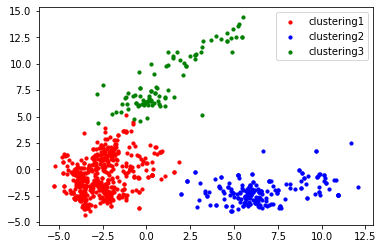

In [15]:
#pca(주성분 분석)으로 시각화하기
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2) # 2차원으로 축소
pc = pca.fit_transform(corpus_embeddings)
p_df = pd.DataFrame(data=pc, columns=['main1', 'main2'])
p_df.index=df['Cluster_label']

plt.scatter(p_df.iloc[clustering_model.labels_ == 0,0],
            p_df.iloc[clustering_model.labels_ == 0,1], s = 10, c = 'red', label = 'clustering1')
plt.scatter(p_df.iloc[clustering_model.labels_ == 1,0],
            p_df.iloc[clustering_model.labels_ == 1,1], s = 10, c = 'blue', label = 'clustering2')
plt.scatter(p_df.iloc[clustering_model.labels_ == 2,0],
            p_df.iloc[clustering_model.labels_ == 2,1], s = 10, c = 'green', label = 'clustering3')


plt.legend()
plt.show()

In [16]:
# 2개로 클러스터링
model_path = model_save_path

model = SentenceTransformer(model_path)

corpus_embeddings = model.encode(corpus)

num_clusters = 2
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['네이버 창업자인 이해진 글로벌투자책임자. 연합뉴스지난달 네이버 본사 직원이 극단적 선택을 해 사망한 사건에 대해 창업자인 이해진 글로벌투자책임자가 내부 구성원들에게 사과하면서 자신을 포함한 현 경영진의 전면 쇄신을 시사했다.IT 업계 등에 따르면 이해진 GIO는 이날 전 임직원에 보낸 메일에서 "그동안의 일들에 모두 충격도 받고 실망도 분노도 크셨으리라 생각한다. 저 역시 너무도 큰 충격이었고 헤어나오기가 어렵다"면서 "지금 겪고 있는 일들은 회사 문화와 관련된 문제이기에 제 부족함과 잘못이 제일 크다고 생각한다"고 사건 발생 한 달여만에 처음으로 직접 사과했다.이 GIO는 "이 회사 안에서 괴롭힘이 발생했고 그것이 비극적인 사건으로 이어졌다면 이것은 회사 전체적인 문화의 문제이며 한두 사람의 징계 수위를 통해서 해결될 수 있는 문제가 아니라고 생각한다"면서 "이번을 계기로 이사회가 경영진에게 제안한 것처럼 권한이 더욱 분산되고 책임이 더욱 명확해지고 더 젊고 새로운 리더들이 나타나서 회사를 이끄는 전면 쇄신을 해야 하는 길이 그 근본적이고 본질적인 해결책"이라고 강조했다.또 그는 "회사의 새 구조가 짜이고 다음 경영진이 선임되고 하려면 어쩔 수 없는 시간이 필요하고 그사이에 경영 공백이 생기지 않도록 지금도 열심히 일하고 있는 동료들의 고생이 성과로 이어지도록, 투자가와 파트너사들과 주주들에게 신뢰를 잃지 않도록 충실히 다음 경영진에게 인수인계 해야 하는 의무가 있다"고 설명했다. 그러면서 "가능한 한 빨리 이런 쇄신이 이루어지도록 최선을 다할 것이고 늦어도 연말까지 해내야 한다는 이사회의 제안이 맞는다고 생각한다"며 "회사에서 한 발 더 멀리 떨어져서 저 스스로를 냉정히 돌아보는 성찰의 시간이 필요하지 않나 생각한다"고 덧붙였다.7일 오전 경기도 성남시 네이버 그린팩토리 앞에서 열린 \'동료의 안타까운 죽음에 대한 진상규명과 재발 방지를 위한 노동조합의 입장 발표 기자회견\'에서 네이버 노조 \'공동성명\' 관계자가 발언하고 있다. 

In [17]:
cluster_label = clustering_model.labels_

In [18]:
df['Cluster_label2'] = cluster_label

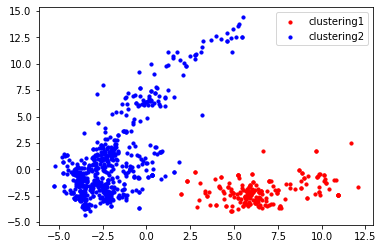

In [21]:
pca = PCA(n_components=2) # 2차원으로 축소
pc = pca.fit_transform(corpus_embeddings)
p_df = pd.DataFrame(data=pc, columns=['main1', 'main2'])
p_df.index=df['Cluster_label2']

plt.scatter(p_df.iloc[clustering_model.labels_ == 0,0],
            p_df.iloc[clustering_model.labels_ == 0,1], s = 10, c = 'red', label = 'clustering1')
plt.scatter(p_df.iloc[clustering_model.labels_ == 1,0],
            p_df.iloc[clustering_model.labels_ == 1,1], s = 10, c = 'blue', label = 'clustering2')

plt.legend()
plt.show()

In [22]:
df.loc[df['Cluster_label'] == 0]

title           paper  \
0                            ‘1위 OTT’ 노리는 티빙…네이버가 지원한다            조선비즈   
3                           네이버-카카오 인증서로 ‘나의건강기록’ 확인한다  financial news   
4          네이버, 티빙(TVING)에 400억 지분투자…2023년 800만 가입자 목표          edaily   
5                           윤석열 별명 ‘도리도리’…네이버에서 차단된 이유            조선일보   
6                     네이버 멤버십에 쿠팡이츠 할인까지…통신사 멤버십은 진화 중       Joins.com   
..                                                 ...             ...   
852                     카카오 첫 시총 3위 마감…7년만에 네이버 추월(종합)            연합뉴스   
853                          코스피 역대 최고치…카카오·네이버 이틀째 약세             MBC   
854            네이버, 안드로이드 오토 출시 무기한 연기…“직원 극단적 선택 후폭풍”            조선비즈   
855         네이버, AI '클로바 포캐스트'로 물류 혁신…"딥러닝 접목해 기술 고도화"             뉴스1   
856  "지금이 삼성전자 담을 적기"…카카오 네이버 '씽씽' 외면받는 반도체 비중 늘려야 ...            매경닷컴   

            date                                                url  \
0    2021.06.30.  https://news.naver.com/main/read.naver?mode=LS...   
3    2021.06.30.  https://news.naver.com/main/read.naver?mode=LS...   
4    2021.06.30.  https://news.naver.com/main/read.naver?mode=LS...   
5    2021.06.30.  https://news.naver.com/main/read.naver?mode=LS...   
6    2021.06.30.  https://news.naver.com/main/read.naver?mode=LS...   
..           ...                                                ...   
852  2021.06.15.  https://news.naver.com/main/read.naver?mode=LS...   
853  2021.06.25.  https://news.naver.com/main/read.naver?mode=LS...   
854  2021.06.23.  https://news.naver.com/main/read.naver?mode=LS...   
855  2021.06.22.  https://news.naver.com/main/read.naver?mode=LS...   
856  2021.06.24.  https://news.naver.com/main/read.naver?mode=LS...   

                                               content  Cluster_label  \
0    지분 투자 단행웹툰·웹소설 원작 오리지널 콘텐츠 만들 듯양지을·이명한 티빙 대표가 ...              0   
3    양사, 보건복지부-한국보건의료정보원 MOU“앱으로 진료, 건강검진, 예방접종 이력 ...              0   
4    네이버, JTBC 스튜디오에 이어 티빙 지분투자26만주 획득..지분율 15.4% 확...              0   
5    윤석열 전 검찰총장이 대선 출마 기자회견에서 고개를 좌우로 자주 흔들어 ‘도리도리 ...              0   
6    SK텔레콤은 제휴사 할인 중심으로 운영된 기존의 ‘T 멤버십’을 고객의 소비 트렌드...              0   
..                                                 ...            ...   
852  시총 64조…올해만 30조 급증카카오 코스피      김아람 기자 = 카카오가 15...              0   
853  동영상 뉴스     \t \t삼성증권입니다.전 거래일 종가 기준으로 사상 최고 기록...              0   
854  안드로이드 오토 5월 지원 발표 후 돌연 연기최인혁 COO 등 핵심인력 이번 사태로...              0   
855  물류센터 뿐 아니라 판매자 및 개별 스토어의 수요 예측까지 확대 목표"초대규모 AI...              0   
856  올해 부진한 수익률을 기록하고 있는 반도체주 비중을 늘려야 한다는 분석이 나왔다. ...              0   

     Cluster_label2  
0                 1  
3                 1  
4                 1  
5                 1  
6                 1  
..              ...  
852               1  
853               1  
854               1  
855               1  
856               1  

[555 rows x 7 columns]

In [23]:
df.loc[df['Cluster_label'] == 1]

title        paper         date  \
1          '네이버 직원 사망' 이해진 "제 부족함·잘못 크다" 구성원에 사과         부산일보  2021.06.30.   
2               이해진 네이버 창업자 "직원 극단적 선택, 제 잘못 크다"   MoneyToday  2021.06.30.   
18                  이해진, 네이버 직원 사망 관련 "경영진 쇄신해야"       연합뉴스TV  2021.06.30.   
32         네이버 노조 “꼬리 자르기 말고… 최인혁, 모든 계열사서 해임하라”         조선일보  2021.06.28.   
33         네이버노조 "최인혁 직장내 괴롭힘 비호…모든 보직 해임하라"(종합)          뉴시스  2021.06.28.   
..                                           ...          ...          ...   
782            노동부 장관, "네이버 직원 사망 '직장 내 괴롭힘' 맞다"  SBS & SBSi   2021.06.24.   
791  [속보] 네이버 “최인혁 COO, ‘직원 사망 사건’에 도의적 책임지고 사의”         세계닷컴  2021.06.25.   
792  [속보] 네이버 “최인혁 COO, ‘직원 사망 사건’에 도의적 책임지고 사의”         세계닷컴  2021.06.25.   
810         네이버 ‘직장 내 괴롭힘’ 인정한 고용노동부…‘봐주기 조사’ 논란         조선비즈  2021.06.24.   
827       노동부 “네이버 사망 직원, 직장 내 괴롭힘”…특별근로감독 2주 연장          KBS  2021.06.24.   

                                                   url  \
1    https://news.naver.com/main/read.naver?mode=LS...   
2    https://news.naver.com/main/read.naver?mode=LS...   
18   https://news.naver.com/main/read.naver?mode=LS...   
32   https://news.naver.com/main/read.naver?mode=LS...   
33   https://news.naver.com/main/read.naver?mode=LS...   
..                                                 ...   
782  https://news.naver.com/main/read.naver?mode=LS...   
791  https://news.naver.com/main/read.naver?mode=LS...   
792  https://news.naver.com/main/read.naver?mode=LS...   
810  https://news.naver.com/main/read.naver?mode=LS...   
827  https://news.naver.com/main/read.naver?mode=LS...   

                                               content  Cluster_label  \
1    네이버 창업자인 이해진 글로벌투자책임자. 연합뉴스지난달 네이버 본사 직원이 극단적 ...              1   
2    이해진 네이버 글로벌투자책임자 /사진=뉴스1네이버 창업자인 이해진 글로벌투자책임자가...              1   
18   동영상 뉴스     \t \t네이버 창업자인 이해진 글로벌투자책임자가 최근 직원 사...              1   
32   네이버 직원 사망 사건 관련 노조의 진상규명 최종보고서 발표회     박동주 기자 ...              1   
33   전진환 기자 = 네이버 노동조합 조합원들이 28일 오전 경기도 성남시 네이버 그린팩...              1   
..                                                 ...            ...   
782  안경덕 고용노동부 장관은 오늘 업무상 스트레스를 호소하며 숨진 네이버 직원에 대해 ...              1   
791  최인혁 네이버 최고운영책임자. 연합뉴스    네이버 “최인혁 COO, ‘직원 사망 ...              1   
792  최인혁 네이버 최고운영책임자. 연합뉴스    네이버 “최인혁 COO, ‘직원 사망 ...              1   
810  네이버 직원 극단적 선택 사건 특별근로감독“직장 내 괴롭힘인가” 질문에 안경덕 장관...              1   
827  고용노동부가 지난달 25일 업무상 스트레스를 호소하며 숨진 네이버 직원 사건과 관련...              1   

     Cluster_label2  
1                 0  
2                 0  
18                0  
32                0  
33                0  
..              ...  
782               0  
791               0  
792               0  
810               0  
827               0  

[208 rows x 7 columns]

In [24]:
df.loc[df['Cluster_label'] == 2]

title       paper         date  \
197  이베이 인수 이마트, 네이버·쿠팡과 新3강…게임 체인저 vs 승자의 저주       매경인터넷  2021.06.29.   
253           네이버, 이베이코리아 인수 철회…신세계 단독 추진(종합)        연합뉴스  2021.06.22.   
258           네이버, 이베이코리아 인수 철회…신세계 단독 추진(종합)        연합뉴스  2021.06.22.   
277     신세계, 네이버 빼고 이베이코리아 단독 인수… 승자의 저주 없을까?         머니S  2021.06.24.   
280     신세계, 네이버 빼고 이베이코리아 단독 인수… 승자의 저주 없을까?         머니S  2021.06.24.   
..                                        ...         ...          ...   
818                네이버, 이베이코리아 인수 포기…신세계 단독으로  media KHAN  2021.06.22.   
831              [속보]신세계·네이버 연합군, 이베이코리아 인수한다   Joins.com  2021.06.16.   
834         혈맹맺은 신세계·네이버, 쿠팡 누르고 이커머스 시장 양분하나   Joins.com  2021.06.16.   
846             네이버 "이베이코리아 인수 안한다"…신세계 단독 추진         MBN  2021.06.22.   
848               네이버, 이베이코리아 인수 철회…신세계 단독 추진      연합뉴스TV  2021.06.22.   

                                                   url  \
197  https://news.naver.com/main/read.naver?mode=LS...   
253  https://news.naver.com/main/read.naver?mode=LS...   
258  https://news.naver.com/main/read.naver?mode=LS...   
277  https://news.naver.com/main/read.naver?mode=LS...   
280  https://news.naver.com/main/read.naver?mode=LS...   
..                                                 ...   
818  https://news.naver.com/main/read.naver?mode=LS...   
831  https://news.naver.com/main/read.naver?mode=LS...   
834  https://news.naver.com/main/read.naver?mode=LS...   
846  https://news.naver.com/main/read.naver?mode=LS...   
848  https://news.naver.com/main/read.naver?mode=LS...   

                                               content  Cluster_label  \
197  G마켓, 옥션을 운영하는 이베이코리아가 신세계그룹에 인수되며 유통 업계 판도가 크게...              2   
253  네이버, 이베이코리아 인수 철회…신세계 단독 추진     홍지인 기자 = 네이버가 ...              2   
258  네이버, 이베이코리아 인수 철회…신세계 단독 추진     홍지인 기자 = 네이버가 ...              2   
277  신세계그룹 이마트와 함께 이베이코리아 인수를 추진하던 네이버가 인수 계획을 철회했다...              2   
280  신세계그룹 이마트와 함께 이베이코리아 인수를 추진하던 네이버가 인수 계획을 철회했다...              2   
..                                                 ...            ...   
818  네이버가 이베이코리아 인수에 참여하지 않겠다는 의사를 밝혔다. 네이버는 22일 “당...              2   
831  정용진 신세계그룹 부회장과 이해진 네이버 창업주. , 연합뉴스       이베이코리...              2   
834  신세계·네이버, 이베이코리아 인수 후보  정용진 신세계그룹 부회장과 이해진 네이버 ...              2   
846  네이버, 22일 인수 의사 공식적으로 철회오늘 네이버가 "당사는 사업 경쟁력 강화를...              2   
848  동영상 뉴스     \t \t네이버가 이베이코리아 인수 의사를 공식적으로 철회했습니...              2   

     Cluster_label2  
197               1  
253               1  
258               1  
277               1  
280               1  
..              ...  
818               1  
831               1  
834               1  
846               1  
848               1  

[94 rows x 7 columns]

In [25]:
# 4개로 클러스터링
model_path = model_save_path

model = SentenceTransformer(model_path)

corpus_embeddings = model.encode(corpus)

num_clusters = 4
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['네이버 창업자인 이해진 글로벌투자책임자. 연합뉴스지난달 네이버 본사 직원이 극단적 선택을 해 사망한 사건에 대해 창업자인 이해진 글로벌투자책임자가 내부 구성원들에게 사과하면서 자신을 포함한 현 경영진의 전면 쇄신을 시사했다.IT 업계 등에 따르면 이해진 GIO는 이날 전 임직원에 보낸 메일에서 "그동안의 일들에 모두 충격도 받고 실망도 분노도 크셨으리라 생각한다. 저 역시 너무도 큰 충격이었고 헤어나오기가 어렵다"면서 "지금 겪고 있는 일들은 회사 문화와 관련된 문제이기에 제 부족함과 잘못이 제일 크다고 생각한다"고 사건 발생 한 달여만에 처음으로 직접 사과했다.이 GIO는 "이 회사 안에서 괴롭힘이 발생했고 그것이 비극적인 사건으로 이어졌다면 이것은 회사 전체적인 문화의 문제이며 한두 사람의 징계 수위를 통해서 해결될 수 있는 문제가 아니라고 생각한다"면서 "이번을 계기로 이사회가 경영진에게 제안한 것처럼 권한이 더욱 분산되고 책임이 더욱 명확해지고 더 젊고 새로운 리더들이 나타나서 회사를 이끄는 전면 쇄신을 해야 하는 길이 그 근본적이고 본질적인 해결책"이라고 강조했다.또 그는 "회사의 새 구조가 짜이고 다음 경영진이 선임되고 하려면 어쩔 수 없는 시간이 필요하고 그사이에 경영 공백이 생기지 않도록 지금도 열심히 일하고 있는 동료들의 고생이 성과로 이어지도록, 투자가와 파트너사들과 주주들에게 신뢰를 잃지 않도록 충실히 다음 경영진에게 인수인계 해야 하는 의무가 있다"고 설명했다. 그러면서 "가능한 한 빨리 이런 쇄신이 이루어지도록 최선을 다할 것이고 늦어도 연말까지 해내야 한다는 이사회의 제안이 맞는다고 생각한다"며 "회사에서 한 발 더 멀리 떨어져서 저 스스로를 냉정히 돌아보는 성찰의 시간이 필요하지 않나 생각한다"고 덧붙였다.7일 오전 경기도 성남시 네이버 그린팩토리 앞에서 열린 \'동료의 안타까운 죽음에 대한 진상규명과 재발 방지를 위한 노동조합의 입장 발표 기자회견\'에서 네이버 노조 \'공동성명\' 관계자가 발언하고 있다. 

In [26]:
cluster_label = clustering_model.labels_

In [27]:
df['Cluster_label3'] = cluster_label

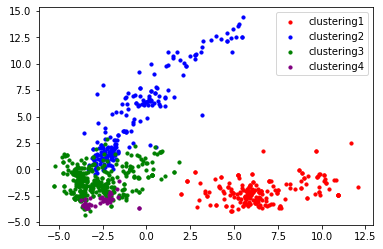

In [28]:
pca = PCA(n_components=2) # 2차원으로 축소
pc = pca.fit_transform(corpus_embeddings)
p_df = pd.DataFrame(data=pc, columns=['main1', 'main2'])
p_df.index=df['Cluster_label']

plt.scatter(p_df.iloc[clustering_model.labels_ == 0,0],
            p_df.iloc[clustering_model.labels_ == 0,1], s = 10, c = 'red', label = 'clustering1')
plt.scatter(p_df.iloc[clustering_model.labels_ == 1,0],
            p_df.iloc[clustering_model.labels_ == 1,1], s = 10, c = 'blue', label = 'clustering2')
plt.scatter(p_df.iloc[clustering_model.labels_ == 2,0],
            p_df.iloc[clustering_model.labels_ == 2,1], s = 10, c = 'green', label = 'clustering3')
plt.scatter(p_df.iloc[clustering_model.labels_ == 3,0],
            p_df.iloc[clustering_model.labels_ == 3,1], s = 10, c = 'purple', label = 'clustering4')
# plt.scatter(p_df.iloc[clustering_model.labels_ == 4,0],
#             p_df.iloc[clustering_model.labels_ == 4,1], s = 10, c = 'black', label = 'clustering5')
# plt.scatter(p_df.iloc[clustering_model.labels_ == 5,0],
#             p_df.iloc[clustering_model.labels_ == 5,1], s = 10, c = 'grey', label = 'clustering6')

plt.legend()
plt.show()

In [30]:
df.loc[df['Cluster_label3'] == 1]

title   paper         date  \
28                            '숨고르기' 끝났나…카카오-네이버 동반 상승     뉴스1  2021.06.30.   
64                 네이버, 티빙에 400억 지분투자...오리지널 콘텐츠 수급 주력     YTN  2021.06.30.   
133                           '숨고르기' 끝났나…카카오-네이버 동반 상승     뉴스1  2021.06.30.   
164           "하반기 금리 올라도 두렵지 않다"…증권사가 꼽은 유망주 '네이버 삼바'    매경닷컴  2021.06.28.   
165           "하반기 금리 올라도 두렵지 않다"…증권사가 꼽은 유망주 '네이버 삼바'    매경닷컴  2021.06.28.   
..                                                 ...     ...          ...   
849                  [특징주] “카카오 게 섰거라”…네이버, 52주 신고가 경신  edaily  2021.06.23.   
850                  [특징주] “카카오 게 섰거라”…네이버, 52주 신고가 경신  edaily  2021.06.23.   
852                     카카오 첫 시총 3위 마감…7년만에 네이버 추월(종합)    연합뉴스  2021.06.15.   
853                          코스피 역대 최고치…카카오·네이버 이틀째 약세     MBC  2021.06.25.   
856  "지금이 삼성전자 담을 적기"…카카오 네이버 '씽씽' 외면받는 반도체 비중 늘려야 ...    매경닷컴  2021.06.24.   

                                                   url  \
28   https://news.naver.com/main/read.naver?mode=LS...   
64   https://news.naver.com/main/read.naver?mode=LS...   
133  https://news.naver.com/main/read.naver?mode=LS...   
164  https://news.naver.com/main/read.naver?mode=LS...   
165  https://news.naver.com/main/read.naver?mode=LS...   
..                                                 ...   
849  https://news.naver.com/main/read.naver?mode=LS...   
850  https://news.naver.com/main/read.naver?mode=LS...   
852  https://news.naver.com/main/read.naver?mode=LS...   
853  https://news.naver.com/main/read.naver?mode=LS...   
856  https://news.naver.com/main/read.naver?mode=LS...   

                                               content  Cluster_label  \
28   2분기도 '역대급' 실적 예고…"고밸류 주가, 실적이 뒷받침"© News1 이지원 ...              0   
64   CJ ENM은 오늘 네이버가 온라인 동영상 서비스 '티빙'에 지분 4백억 원 규모를...              0   
133  2분기도 '역대급' 실적 예고…"고밸류 주가, 실적이 뒷받침"© News1 이지원 ...              0   
164  하나금투·유진투자證 분석네이버, 18조 웹툰 가치 미반영하반기 이커머스 성장세 주목...              0   
165  하나금투·유진투자證 분석네이버, 18조 웹툰 가치 미반영하반기 이커머스 성장세 주목...              0   
..                                                 ...            ...   
849  NAVER가 52주 신고가를 경신했다. 23일 마켓포인트에 따르면 이날 오전 10시...              0   
850  NAVER가 52주 신고가를 경신했다. 23일 마켓포인트에 따르면 이날 오전 10시...              0   
852  시총 64조…올해만 30조 급증카카오 코스피      김아람 기자 = 카카오가 15...              0   
853  동영상 뉴스     \t \t삼성증권입니다.전 거래일 종가 기준으로 사상 최고 기록...              0   
856  올해 부진한 수익률을 기록하고 있는 반도체주 비중을 늘려야 한다는 분석이 나왔다. ...              0   

     Cluster_label2  Cluster_label3  
28                1               1  
64                1               1  
133               1               1  
164               1               1  
165               1               1  
..              ...             ...  
849               1               1  
850               1               1  
852               1               1  
853               1               1  
856               1               1  

[217 rows x 8 columns]

In [32]:
data = df.loc[df['Cluster_label3']==1]
data.reset_index(inplace=True)

In [34]:
data

index                                              title   paper  \
0       28                           '숨고르기' 끝났나…카카오-네이버 동반 상승     뉴스1   
1       64                네이버, 티빙에 400억 지분투자...오리지널 콘텐츠 수급 주력     YTN   
2      133                           '숨고르기' 끝났나…카카오-네이버 동반 상승     뉴스1   
3      164           "하반기 금리 올라도 두렵지 않다"…증권사가 꼽은 유망주 '네이버 삼바'    매경닷컴   
4      165           "하반기 금리 올라도 두렵지 않다"…증권사가 꼽은 유망주 '네이버 삼바'    매경닷컴   
..     ...                                                ...     ...   
212    849                  [특징주] “카카오 게 섰거라”…네이버, 52주 신고가 경신  edaily   
213    850                  [특징주] “카카오 게 섰거라”…네이버, 52주 신고가 경신  edaily   
214    852                     카카오 첫 시총 3위 마감…7년만에 네이버 추월(종합)    연합뉴스   
215    853                          코스피 역대 최고치…카카오·네이버 이틀째 약세     MBC   
216    856  "지금이 삼성전자 담을 적기"…카카오 네이버 '씽씽' 외면받는 반도체 비중 늘려야 ...    매경닷컴   

            date                                                url  \
0    2021.06.30.  https://news.naver.com/main/read.naver?mode=LS...   
1    2021.06.30.  https://news.naver.com/main/read.naver?mode=LS...   
2    2021.06.30.  https://news.naver.com/main/read.naver?mode=LS...   
3    2021.06.28.  https://news.naver.com/main/read.naver?mode=LS...   
4    2021.06.28.  https://news.naver.com/main/read.naver?mode=LS...   
..           ...                                                ...   
212  2021.06.23.  https://news.naver.com/main/read.naver?mode=LS...   
213  2021.06.23.  https://news.naver.com/main/read.naver?mode=LS...   
214  2021.06.15.  https://news.naver.com/main/read.naver?mode=LS...   
215  2021.06.25.  https://news.naver.com/main/read.naver?mode=LS...   
216  2021.06.24.  https://news.naver.com/main/read.naver?mode=LS...   

                                               content  Cluster_label  \
0    2분기도 '역대급' 실적 예고…"고밸류 주가, 실적이 뒷받침"© News1 이지원 ...              0   
1    CJ ENM은 오늘 네이버가 온라인 동영상 서비스 '티빙'에 지분 4백억 원 규모를...              0   
2    2분기도 '역대급' 실적 예고…"고밸류 주가, 실적이 뒷받침"© News1 이지원 ...              0   
3    하나금투·유진투자證 분석네이버, 18조 웹툰 가치 미반영하반기 이커머스 성장세 주목...              0   
4    하나금투·유진투자證 분석네이버, 18조 웹툰 가치 미반영하반기 이커머스 성장세 주목...              0   
..                                                 ...            ...   
212  NAVER가 52주 신고가를 경신했다. 23일 마켓포인트에 따르면 이날 오전 10시...              0   
213  NAVER가 52주 신고가를 경신했다. 23일 마켓포인트에 따르면 이날 오전 10시...              0   
214  시총 64조…올해만 30조 급증카카오 코스피      김아람 기자 = 카카오가 15...              0   
215  동영상 뉴스     \t \t삼성증권입니다.전 거래일 종가 기준으로 사상 최고 기록...              0   
216  올해 부진한 수익률을 기록하고 있는 반도체주 비중을 늘려야 한다는 분석이 나왔다. ...              0   

     Cluster_label2  Cluster_label3  
0                 1               1  
1                 1               1  
2                 1               1  
3                 1               1  
4                 1               1  
..              ...             ...  
212               1               1  
213               1               1  
214               1               1  
215               1               1  
216               1               1  

[217 rows x 9 columns]

In [36]:
data.drop(columns='index', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
data = data[['title', 'date', 'content']]

In [39]:
data

title         date  \
0                             '숨고르기' 끝났나…카카오-네이버 동반 상승  2021.06.30.   
1                  네이버, 티빙에 400억 지분투자...오리지널 콘텐츠 수급 주력  2021.06.30.   
2                             '숨고르기' 끝났나…카카오-네이버 동반 상승  2021.06.30.   
3             "하반기 금리 올라도 두렵지 않다"…증권사가 꼽은 유망주 '네이버 삼바'  2021.06.28.   
4             "하반기 금리 올라도 두렵지 않다"…증권사가 꼽은 유망주 '네이버 삼바'  2021.06.28.   
..                                                 ...          ...   
212                  [특징주] “카카오 게 섰거라”…네이버, 52주 신고가 경신  2021.06.23.   
213                  [특징주] “카카오 게 섰거라”…네이버, 52주 신고가 경신  2021.06.23.   
214                     카카오 첫 시총 3위 마감…7년만에 네이버 추월(종합)  2021.06.15.   
215                          코스피 역대 최고치…카카오·네이버 이틀째 약세  2021.06.25.   
216  "지금이 삼성전자 담을 적기"…카카오 네이버 '씽씽' 외면받는 반도체 비중 늘려야 ...  2021.06.24.   

                                               content  
0    2분기도 '역대급' 실적 예고…"고밸류 주가, 실적이 뒷받침"© News1 이지원 ...  
1    CJ ENM은 오늘 네이버가 온라인 동영상 서비스 '티빙'에 지분 4백억 원 규모를...  
2    2분기도 '역대급' 실적 예고…"고밸류 주가, 실적이 뒷받침"© News1 이지원 ...  
3    하나금투·유진투자證 분석네이버, 18조 웹툰 가치 미반영하반기 이커머스 성장세 주목...  
4    하나금투·유진투자證 분석네이버, 18조 웹툰 가치 미반영하반기 이커머스 성장세 주목...  
..                                                 ...  
212  NAVER가 52주 신고가를 경신했다. 23일 마켓포인트에 따르면 이날 오전 10시...  
213  NAVER가 52주 신고가를 경신했다. 23일 마켓포인트에 따르면 이날 오전 10시...  
214  시총 64조…올해만 30조 급증카카오 코스피      김아람 기자 = 카카오가 15...  
215  동영상 뉴스     \t \t삼성증권입니다.전 거래일 종가 기준으로 사상 최고 기록...  
216  올해 부진한 수익률을 기록하고 있는 반도체주 비중을 늘려야 한다는 분석이 나왔다. ...  

[217 rows x 3 columns]

In [40]:
s_df = df.loc[df['Cluster_label3'] != 1]

In [41]:
s_df.reset_index(inplace=True)

In [42]:
s_df.drop(columns='index', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
s_df = s_df[['title', 'date', 'content']]

In [44]:
s_df

title         date  \
0                      ‘1위 OTT’ 노리는 티빙…네이버가 지원한다  2021.06.30.   
1          '네이버 직원 사망' 이해진 "제 부족함·잘못 크다" 구성원에 사과  2021.06.30.   
2               이해진 네이버 창업자 "직원 극단적 선택, 제 잘못 크다"  2021.06.30.   
3                     네이버-카카오 인증서로 ‘나의건강기록’ 확인한다  2021.06.30.   
4    네이버, 티빙(TVING)에 400억 지분투자…2023년 800만 가입자 목표  2021.06.30.   
..                                           ...          ...   
635          경기농수산진흥원, 네이버 해피빈에 농식품 온라인 공동구매장 마련  2021.06.21.   
636       네이버웹툰 “태국·대만·인니 3개국 월간 사용자수 1200만명 넘어”  2021.06.13.   
637             네이버 "경영 쇄신… 연말까지 새로운 리더십 구축"(2보)  2021.06.25.   
638      네이버, 안드로이드 오토 출시 무기한 연기…“직원 극단적 선택 후폭풍”  2021.06.23.   
639   네이버, AI '클로바 포캐스트'로 물류 혁신…"딥러닝 접목해 기술 고도화"  2021.06.22.   

                                               content  
0    지분 투자 단행웹툰·웹소설 원작 오리지널 콘텐츠 만들 듯양지을·이명한 티빙 대표가 ...  
1    네이버 창업자인 이해진 글로벌투자책임자. 연합뉴스지난달 네이버 본사 직원이 극단적 ...  
2    이해진 네이버 글로벌투자책임자 /사진=뉴스1네이버 창업자인 이해진 글로벌투자책임자가...  
3    양사, 보건복지부-한국보건의료정보원 MOU“앱으로 진료, 건강검진, 예방접종 이력 ...  
4    네이버, JTBC 스튜디오에 이어 티빙 지분투자26만주 획득..지분율 15.4% 확...  
..                                                 ...  
635  크라우드 펀딩을 통해 도내 우수 농식품 판로 지원경기도청 전경 경기도농수산진흥원은 ...  
636  네이버웹툰 제공        네이버웹툰은 인도네시아, 태국, 대만에서 월간 순 사용...  
637                                           25일 네이버.  
638  안드로이드 오토 5월 지원 발표 후 돌연 연기최인혁 COO 등 핵심인력 이번 사태로...  
639  물류센터 뿐 아니라 판매자 및 개별 스토어의 수요 예측까지 확대 목표"초대규모 AI...  

[640 rows x 3 columns]

In [45]:
s_df.to_excel('/content/drive/MyDrive/프로젝트/naver_june.xlsx', index=False)

In [46]:
data.to_excel('/content/drive/MyDrive/프로젝트/naver_june_stock.xlsx', index=False)

title         date  \
0                             '숨고르기' 끝났나…카카오-네이버 동반 상승  2021.06.30.   
1                  네이버, 티빙에 400억 지분투자...오리지널 콘텐츠 수급 주력  2021.06.30.   
2                             '숨고르기' 끝났나…카카오-네이버 동반 상승  2021.06.30.   
3             "하반기 금리 올라도 두렵지 않다"…증권사가 꼽은 유망주 '네이버 삼바'  2021.06.28.   
4             "하반기 금리 올라도 두렵지 않다"…증권사가 꼽은 유망주 '네이버 삼바'  2021.06.28.   
..                                                 ...          ...   
212                  [특징주] “카카오 게 섰거라”…네이버, 52주 신고가 경신  2021.06.23.   
213                  [특징주] “카카오 게 섰거라”…네이버, 52주 신고가 경신  2021.06.23.   
214                     카카오 첫 시총 3위 마감…7년만에 네이버 추월(종합)  2021.06.15.   
215                          코스피 역대 최고치…카카오·네이버 이틀째 약세  2021.06.25.   
216  "지금이 삼성전자 담을 적기"…카카오 네이버 '씽씽' 외면받는 반도체 비중 늘려야 ...  2021.06.24.   

                                               content  
0    2분기도 '역대급' 실적 예고…"고밸류 주가, 실적이 뒷받침"© News1 이지원 ...  
1    CJ ENM은 오늘 네이버가 온라인 동영상 서비스 '티빙'에 지분 4백억 원 규모를...  
2    2분기도 '역대급' 실적 예고…"고밸류 주가, 실적이 뒷받침"© News1 이지원 ...  
3    하나금투·유진투자證 분석네이버, 18조 웹툰 가치 미반영하반기 이커머스 성장세 주목...  
4    하나금투·유진투자證 분석네이버, 18조 웹툰 가치 미반영하반기 이커머스 성장세 주목...  
..                                                 ...  
212  NAVER가 52주 신고가를 경신했다. 23일 마켓포인트에 따르면 이날 오전 10시...  
213  NAVER가 52주 신고가를 경신했다. 23일 마켓포인트에 따르면 이날 오전 10시...  
214  시총 64조…올해만 30조 급증카카오 코스피      김아람 기자 = 카카오가 15...  
215  동영상 뉴스     \t \t삼성증권입니다.전 거래일 종가 기준으로 사상 최고 기록...  
216  올해 부진한 수익률을 기록하고 있는 반도체주 비중을 늘려야 한다는 분석이 나왔다. ...  

[217 rows x 3 columns]

In [1]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/프로젝트/naver_june_stock.xlsx')

In [40]:
data = pd.read_excel('/content/drive/MyDrive/프로젝트/naver_june.xlsx')

In [2]:
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Mecab
from bertopic import BERTopic

In [3]:
data = pd.read_excel('/content/drive/MyDrive/프로젝트/naver_june.xlsx')

In [42]:
for i in range(len(data)):
    if type(data['content'][i]) != str:
        print(i)

304
305
465
620


In [47]:
data = data.dropna()

In [48]:
import re
# total['TITLE2'] = [re.sub('[^A-Za-z0-9가-힣]', '', s) for s in total['제목']]

data['text'] = [re.sub('[^가-힣]', ' ', s) for s in data['content']]

In [49]:
data

title         date  \
0                      ‘1위 OTT’ 노리는 티빙…네이버가 지원한다  2021.06.30.   
1          '네이버 직원 사망' 이해진 "제 부족함·잘못 크다" 구성원에 사과  2021.06.30.   
2               이해진 네이버 창업자 "직원 극단적 선택, 제 잘못 크다"  2021.06.30.   
3                     네이버-카카오 인증서로 ‘나의건강기록’ 확인한다  2021.06.30.   
4    네이버, 티빙(TVING)에 400억 지분투자…2023년 800만 가입자 목표  2021.06.30.   
..                                           ...          ...   
635          경기농수산진흥원, 네이버 해피빈에 농식품 온라인 공동구매장 마련  2021.06.21.   
636       네이버웹툰 “태국·대만·인니 3개국 월간 사용자수 1200만명 넘어”  2021.06.13.   
637             네이버 "경영 쇄신… 연말까지 새로운 리더십 구축"(2보)  2021.06.25.   
638      네이버, 안드로이드 오토 출시 무기한 연기…“직원 극단적 선택 후폭풍”  2021.06.23.   
639   네이버, AI '클로바 포캐스트'로 물류 혁신…"딥러닝 접목해 기술 고도화"  2021.06.22.   

                                               content  \
0    지분 투자 단행웹툰·웹소설 원작 오리지널 콘텐츠 만들 듯양지을·이명한 티빙 대표가 ...   
1    네이버 창업자인 이해진 글로벌투자책임자. 연합뉴스지난달 네이버 본사 직원이 극단적 ...   
2    이해진 네이버 글로벌투자책임자 /사진=뉴스1네이버 창업자인 이해진 글로벌투자책임자가...   
3    양사, 보건복지부-한국보건의료정보원 MOU“앱으로 진료, 건강검진, 예방접종 이력 ...   
4    네이버, JTBC 스튜디오에 이어 티빙 지분투자26만주 획득..지분율 15.4% 확...   
..                                                 ...   
635  크라우드 펀딩을 통해 도내 우수 농식품 판로 지원경기도청 전경 경기도농수산진흥원은 ...   
636  네이버웹툰 제공        네이버웹툰은 인도네시아, 태국, 대만에서 월간 순 사용...   
637                                           25일 네이버.   
638  안드로이드 오토 5월 지원 발표 후 돌연 연기최인혁 COO 등 핵심인력 이번 사태로...   
639  물류센터 뿐 아니라 판매자 및 개별 스토어의 수요 예측까지 확대 목표"초대규모 AI...   

                                                  text  
0    지분 투자 단행웹툰 웹소설 원작 오리지널 콘텐츠 만들 듯양지을 이명한 티빙 대표가 ...  
1    네이버 창업자인 이해진 글로벌투자책임자  연합뉴스지난달 네이버 본사 직원이 극단적 ...  
2    이해진 네이버 글로벌투자책임자  사진 뉴스 네이버 창업자인 이해진 글로벌투자책임자가...  
3    양사  보건복지부 한국보건의료정보원     앱으로 진료  건강검진  예방접종 이력 ...  
4    네이버       스튜디오에 이어 티빙 지분투자  만주 획득  지분율       확...  
..                                                 ...  
635  크라우드 펀딩을 통해 도내 우수 농식품 판로 지원경기도청 전경 경기도농수산진흥원은 ...  
636  네이버웹툰 제공        네이버웹툰은 인도네시아  태국  대만에서 월간 순 사용...  
637                                             일 네이버   
638  안드로이드 오토  월 지원 발표 후 돌연 연기최인혁     등 핵심인력 이번 사태로...  
639  물류센터 뿐 아니라 판매자 및 개별 스토어의 수요 예측까지 확대 목표 초대규모   ...  

[636 rows x 4 columns]

In [51]:
data.reset_index(inplace=True)
data.drop(columns='index', axis=1, inplace=True)

In [52]:
documents = []
for i in range(len(data)):
    documents.append(data['text'][i])

In [53]:
documents[:5]

['지분 투자 단행웹툰 웹소설 원작 오리지널 콘텐츠 만들 듯양지을 이명한 티빙 대표가   일 서울 마포구 상암동        센터에서 열린 기자 간담회  비전 스트림 에서 미래 성장 전략을 발표하고 있다          제공            년까지 국내  위 온라인 동영상 서비스 플랫폼이 되겠다고 선언한 티빙이 네이버의 지원을 받아 성장 속도를 높인다 티빙은   일  네이버가 티빙에 대한 지분 투자를 단행해 사업 협력 체제를 공고히 했다 라며  향후 양사가 티빙 성장을 위한 협력을 강화할 계획이다 라고 밝혔다 양사의 협력은 네이버 웹툰 웹소설 등 콘텐츠를 티빙 오리지널 콘텐츠로 제작하는 등의 방식으로 이뤄질 것으로 보인다  티빙은  네이버의 투자는     성공의 핵심 열쇠라고 할 수 있는 오리지널 콘텐츠에 대한 투자를 가속화하기 위해 이뤄졌다 라며  콘텐츠 기획 제작 역량을 가진        과 웹툰 웹소설 등 다양한 콘텐츠 지적재산을 가진 네이버의 시너지를 극대화하겠다 고 설명했다 네이버는 지난해   월 티빙의 모회사       과의 지분 맞교환을 통해 협력 관계를 이어왔다  지난  월부터는 네이버의 유료 구독 서비스인  네이버플러스 멤버십  가입자에게 티빙 무료 이용 혜택을 주고 있다 티빙은     년까지 넷플릭스  웨이브를 꺾고 국내  위     플랫폼으로 거듭나겠다는 목표로  그때까지    여편의 오리지널 콘텐츠를 제작하고    만명의 유료 가입자를 확보하기로 했다  내년엔 미국  일본  동남아 등 해외 진출도 시작한다 ',
 '네이버 창업자인 이해진 글로벌투자책임자  연합뉴스지난달 네이버 본사 직원이 극단적 선택을 해 사망한 사건에 대해 창업자인 이해진 글로벌투자책임자가 내부 구성원들에게 사과하면서 자신을 포함한 현 경영진의 전면 쇄신을 시사했다    업계 등에 따르면 이해진    는 이날 전 임직원에 보낸 메일에서  그동안의 일들에 모두 충격도 받고 실망도 분노도 크셨으리라 생각한다  저 역시 너무도 큰 충격이었고 헤어나오기가 어렵다 면서  지금

In [27]:
class CustomTokenizer:
    def __init__(self, tagger):
        self.tagger = tagger
    def __call__(self, sent):
        sent = sent[:1000000]
        word_tokens = self.tagger.morphs(sent)
        result = [word for word in word_tokens if len(word) > 1]
        return result

In [107]:
custom_tokenizer = CustomTokenizer(Mecab())

In [108]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, max_features=3000)

In [109]:
model = BERTopic(embedding_model="sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens", \
                 vectorizer_model=vectorizer,
                 nr_topics=5,
                 top_n_words=10,
                 calculate_probabilities=True)

In [57]:
topics, probs = model.fit_transform(documents)

In [58]:
model.visualize_topics()

In [59]:
model.visualize_distribution(probs[0])

In [60]:
for i in range(0, 5):
  print(i,'번째 토픽 :', model.get_topic(i))

0 번째 토픽 : [('네이버', 0.07451062283257805), ('직원', 0.047920575060221654), ('에서', 0.04429273746070341), ('조사', 0.044223868893492786), ('임원', 0.04038167910738548), ('사건', 0.03670279429943505), ('으로', 0.0353160586893893), ('노조', 0.03506988061207465), ('괴롭힘', 0.03438574523720796), ('책임', 0.0330100852812268)]
1 번째 토픽 : [('웹툰', 0.07191002584004282), ('네이버', 0.059429519474519805), ('콘텐츠', 0.04849974021129232), ('으로', 0.04309594756569547), ('검색', 0.04064346523080342), ('에서', 0.03761140663133653), ('패드', 0.03748833367371553), ('스튜디오', 0.0327953643849518), ('토픽', 0.029231806021262127), ('글로벌', 0.029081863833007055)]
2 번째 토픽 : [('물류', 0.06745012451225632), ('센터', 0.060604187483474264), ('네이버', 0.058531329724131796), ('으로', 0.056649887994538475), ('시장', 0.048359319883976314), ('주문', 0.03966354400000161), ('상품', 0.03518725730818129), ('배송', 0.03493614994187107), ('예측', 0.03333239401477467), ('에서', 0.032353635918836984)]
3 번째 토픽 : [('네이버', 0.06682067224608403), ('노조', 0.050102192430973934), ('임원', 0.04

# 5월 기사들(주가하락 달)

In [61]:
d_df = pd.read_excel('/content/drive/MyDrive/프로젝트/naver dataset(21-01~22-03/네이버_210501~210531 테스트 데이터.xlsx')

In [62]:
d_df

title   paper         date  \
0         네이버, 전주시 코로나 백신 접종자 AI로 이상반응 모니터링    조선비즈  2021.05.31.   
1        얀센 잔여백신도 모바일예약 가능할 듯…"네이버-카카오와 협의"    연합뉴스  2021.05.31.   
2               네이버 인증서 이용자 천만명 돌파…MZ세대가 과반     뉴시스  2021.05.31.   
3             네이버, 웹소설 공모전 6월 접수 개시…총상금 8억원  edaily  2021.05.31.   
4      ‘AI로 백신 이상반응 확인한다’ 전주시, 네이버와 모니터링 운영     뉴스1  2021.05.31.   
..                                      ...     ...          ...   
856        네이버·카카오·P2P 사업자, 금감원 감독분담금 의무 부과  디지털타임스  2021.05.19.   
857          네이버파이낸셜, '네이버페이 현장결제' 수수료 전액지원    연합뉴스  2021.05.20.   
858  SC제일은행 "카카오톡·네이버 포스트에서도 웰쓰케어 소식 만나보세요"     뉴스1  2021.05.24.   
859       "라방으로 알뜰폰 가입한다"…SK세븐모바일, 네이버쇼핑 방송    연합뉴스  2021.05.17.   
860         논란의 '네이버 블로그 챌린지' 재개…기존 참여자만 대상     YTN  2021.05.18.   

                                                   url  \
0    https://news.naver.com/main/read.naver?mode=LS...   
1    https://news.naver.com/main/read.naver?mode=LS...   
2    https://news.naver.com/main/read.naver?mode=LS...   
3    https://news.naver.com/main/read.naver?mode=LS...   
4    https://news.naver.com/main/read.naver?mode=LS...   
..                                                 ...   
856  https://news.naver.com/main/read.naver?mode=LS...   
857  https://news.naver.com/main/read.naver?mode=LS...   
858  https://news.naver.com/main/read.naver?mode=LS...   
859  https://news.naver.com/main/read.naver?mode=LS...   
860  https://news.naver.com/main/read.naver?mode=LS...   

                                               content  
0    일부 지역서 75세 이상 접종자 대상 사흘간 AI 전화로 체크 백신 이상반응 모니터...  
1    예비명단·모바일앱 통한 잔여백신 접종자중 40∼50대가 83%'잔여 백신' 당일 예...  
2    이진영 기자 = 네이버는 네이버 인증서가 MZ세대의 호응에 힘입어 지난주 가입자가 ...  
3    네이버는 네이버웹툰이 총 상금 8억원 규모의 ‘2021 네이버웹툰 지상최대공모전’ ...  
4    만 75세 이상 어르신에 대한 코로나19 백신 접종이 시작된 1일 전북 전주시 화산...  
..                                                 ...  
856  금융영역 내 분담금 배분기준     네이버파이낸셜과 카카오페이 등 전자금융업자와 P...  
857  정윤주 기자 = 네이버파이낸셜은 신종 코로나바이러스 감염증 장기화로 어려움을 겪는 ...  
858  SC제일은행은 웰쓰케어 디지털 채널을 카카오톡과 네이버 포스트 페이지로 확대한다고 ...  
859  SK세븐모바일 라이브 방송     채새롬 기자 = SK텔링크는 최근 MZ세대 중심으...  
860  ⓒ네이버 블로그 팀네이버가 사흘 만에 조기 종료해 '작심삼일' 비판을 받은 블로그 ...  

[861 rows x 5 columns]

In [65]:
for i in range(len(d_df)):
    if type(d_df['content'][i]) != str:
        print(i)

title   paper         date  \
0         네이버, 전주시 코로나 백신 접종자 AI로 이상반응 모니터링    조선비즈  2021.05.31.   
1        얀센 잔여백신도 모바일예약 가능할 듯…"네이버-카카오와 협의"    연합뉴스  2021.05.31.   
2               네이버 인증서 이용자 천만명 돌파…MZ세대가 과반     뉴시스  2021.05.31.   
3             네이버, 웹소설 공모전 6월 접수 개시…총상금 8억원  edaily  2021.05.31.   
4      ‘AI로 백신 이상반응 확인한다’ 전주시, 네이버와 모니터링 운영     뉴스1  2021.05.31.   
..                                      ...     ...          ...   
856        네이버·카카오·P2P 사업자, 금감원 감독분담금 의무 부과  디지털타임스  2021.05.19.   
857          네이버파이낸셜, '네이버페이 현장결제' 수수료 전액지원    연합뉴스  2021.05.20.   
858  SC제일은행 "카카오톡·네이버 포스트에서도 웰쓰케어 소식 만나보세요"     뉴스1  2021.05.24.   
859       "라방으로 알뜰폰 가입한다"…SK세븐모바일, 네이버쇼핑 방송    연합뉴스  2021.05.17.   
860         논란의 '네이버 블로그 챌린지' 재개…기존 참여자만 대상     YTN  2021.05.18.   

                                                   url  \
0    https://news.naver.com/main/read.naver?mode=LS...   
1    https://news.naver.com/main/read.naver?mode=LS...   
2    https://news.naver.com/main/read.naver?mode=LS...   
3    https://news.naver.com/main/read.naver?mode=LS...   
4    https://news.naver.com/main/read.naver?mode=LS...   
..                                                 ...   
856  https://news.naver.com/main/read.naver?mode=LS...   
857  https://news.naver.com/main/read.naver?mode=LS...   
858  https://news.naver.com/main/read.naver?mode=LS...   
859  https://news.naver.com/main/read.naver?mode=LS...   
860  https://news.naver.com/main/read.naver?mode=LS...   

                                               content  
0    일부 지역서 75세 이상 접종자 대상 사흘간 AI 전화로 체크 백신 이상반응 모니터...  
1    예비명단·모바일앱 통한 잔여백신 접종자중 40∼50대가 83%'잔여 백신' 당일 예...  
2    이진영 기자 = 네이버는 네이버 인증서가 MZ세대의 호응에 힘입어 지난주 가입자가 ...  
3    네이버는 네이버웹툰이 총 상금 8억원 규모의 ‘2021 네이버웹툰 지상최대공모전’ ...  
4    만 75세 이상 어르신에 대한 코로나19 백신 접종이 시작된 1일 전북 전주시 화산...  
..                                                 ...  
856  금융영역 내 분담금 배분기준     네이버파이낸셜과 카카오페이 등 전자금융업자와 P...  
857  정윤주 기자 = 네이버파이낸셜은 신종 코로나바이러스 감염증 장기화로 어려움을 겪는 ...  
858  SC제일은행은 웰쓰케어 디지털 채널을 카카오톡과 네이버 포스트 페이지로 확대한다고 ...  
859  SK세븐모바일 라이브 방송     채새롬 기자 = SK텔링크는 최근 MZ세대 중심으...  
860  ⓒ네이버 블로그 팀네이버가 사흘 만에 조기 종료해 '작심삼일' 비판을 받은 블로그 ...  

[861 rows x 5 columns]

In [68]:
corpus = []
for i in range(len(d_df)):
    sent = d_df['content'][i]
    corpus.append(sent)

In [69]:
train_batch_size = 16
num_epochs = 4
model_save_path = '/content/drive/MyDrive/프로젝트/output/kpfSBERT_nli'

In [75]:
model = SentenceTransformer(model_save_path)

In [76]:
# 3개로 클러스터링
model_path = model_save_path

model = SentenceTransformer(model_path)

corpus_embeddings = model.encode(corpus)

# Then, we perform k-means clustering using sklearn:
from sklearn.cluster import KMeans

num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['이진영 기자 = 네이버는 네이버 인증서가 MZ세대의 호응에 힘입어 지난주 가입자가 1000만 명을 돌파했다고 31일 밝혔다. 지난해 3월 첫 선을 보인 네이버 인증서는 올해 3월 400만명, 4월 800만명을 돌파한 데 이어 서비스 고도화에 나서며 빠른 속도로 인증 생태계를 구축하고 있다.특히 네이버 인증서는 모바일 환경에 익숙하고 비대면 방식, 편의성을 선호하는 2030세대에 높은 인기를 끌고 있다. 이용자 과반 수 이상인 54.4%가 MZ세대였던 것. 네이버는 교육 부문 제휴처를 늘린 효과로 분석하고 있다.네이버에 따르면 6개 사이버대학교 재학생 4만여명이 네이버 인증서를 활용해 강의 수강과 수강 신청, 시험 응시 등 교내 서비스를 활발하게 이용하고 있다. 더불어 네이버는 ▲메리츠화재, 교보라이프플래닛 등 다수의 보험회사 ▲KB증권, IBK기업은행, 우리은행, DGB금융그룹, 웰컴저축은행 등 증권/은행/캐피탈, 금융 영역까지 네이버 인증서, 전자문서 제휴영역을 늘려가고 있다.또한 ▲대한민국 1위 아파트 생활 플랫폼 \'아파트아이\', 무인 편의점 선두주자 \'이마트24\' 등의 생활서비스 분야 ▲KT, LG U+, CJ헬로비전 등의 통신분야 ▲한국산업인력공단, 시사YBM, 사람인 등의 자격/취업 분야 등 이용자의 삶 속으로 네이버 인증서/전자문서가 더욱 스며들 수 있도록 제휴처를 넓혀가고 있다.최근 부동산 시장에 대한 2030세대 관심이 높아진 것도 네이버 인증서 인기를 높이는 요인이 됐다. 청약서비스 이용자들은 청약홈에 도입된 네이버 인증서를 통해 별도의 플러그인 설치 없이도 간편하게 청약 신청, 당첨 조회 등 모든 서비스를 이용할 수 있다.이 밖에 지난 27일부터는 질병관리청과 협업해 네이버 \'우리동네 백신알림\' 서비스를 시작했고 예약자의 인적사항을 확인할 때 네이버 인증서를 활용해 편의성을 높였다.네이버 오경수 리더는 "네이버앱에서 현재 이용 가능한 제휴처는 29개, 전자문서 제휴처는 61개, 업무협약과 계약을 맺은 전체 제

In [92]:
cluster_label = clustering_model.labels_

In [78]:
d_df['Cluster_label'] = cluster_label

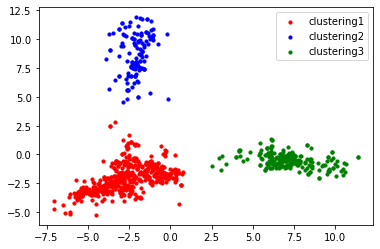

In [80]:
#pca(주성분 분석)으로 시각화하기
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2) # 2차원으로 축소
pc = pca.fit_transform(corpus_embeddings)
p_df = pd.DataFrame(data=pc, columns=['main1', 'main2'])
p_df.index=d_df['Cluster_label']

plt.scatter(p_df.iloc[clustering_model.labels_ == 0,0],
            p_df.iloc[clustering_model.labels_ == 0,1], s = 10, c = 'red', label = 'clustering1')
plt.scatter(p_df.iloc[clustering_model.labels_ == 1,0],
            p_df.iloc[clustering_model.labels_ == 1,1], s = 10, c = 'blue', label = 'clustering2')
plt.scatter(p_df.iloc[clustering_model.labels_ == 2,0],
            p_df.iloc[clustering_model.labels_ == 2,1], s = 10, c = 'green', label = 'clustering3')


plt.legend()
plt.show()

In [83]:
d_df.loc[d_df['Cluster_label'] == 2]

title           paper         date  \
0          네이버, 전주시 코로나 백신 접종자 AI로 이상반응 모니터링            조선비즈  2021.05.31.   
1         얀센 잔여백신도 모바일예약 가능할 듯…"네이버-카카오와 협의"            연합뉴스  2021.05.31.   
4       ‘AI로 백신 이상반응 확인한다’ 전주시, 네이버와 모니터링 운영             뉴스1  2021.05.31.   
10      ‘AI로 백신 이상반응 확인한다’ 전주시, 네이버와 모니터링 운영             뉴스1  2021.05.31.   
20       오늘부터 네이버·카카오 앱에서 '잔여 AZ백신' 조회·예약 가능            연합뉴스  2021.05.27.   
..                                       ...             ...          ...   
824             ‘노쇼백신’ 카카오·네이버로 접종 예약…27일 개통       donga.com  2021.05.14.   
829                  접종 기관 확대…네이버·카카오로 당일 예약             KBS  2021.05.26.   
845  '노쇼' 백신 물량 접종 받으려면…27일부터 네이버·카카오 지도로 예약             뉴스1  2021.05.14.   
849      [속보]27일부터 네이버·카카오 통해 남는 백신 확인·예약 가능            노컷뉴스  2021.05.14.   
851             27일부터 네이버·카카오로 '노쇼' 백신 물량 접종  financial news  2021.05.14.   

                                                   url  \
0    https://news.naver.com/main/read.naver?mode=LS...   
1    https://news.naver.com/main/read.naver?mode=LS...   
4    https://news.naver.com/main/read.naver?mode=LS...   
10   https://news.naver.com/main/read.naver?mode=LS...   
20   https://news.naver.com/main/read.naver?mode=LS...   
..                                                 ...   
824  https://news.naver.com/main/read.naver?mode=LS...   
829  https://news.naver.com/main/read.naver?mode=LS...   
845  https://news.naver.com/main/read.naver?mode=LS...   
849  https://news.naver.com/main/read.naver?mode=LS...   
851  https://news.naver.com/main/read.naver?mode=LS...   

                                               content  Cluster_label  
0    일부 지역서 75세 이상 접종자 대상 사흘간 AI 전화로 체크 백신 이상반응 모니터...              2  
1    예비명단·모바일앱 통한 잔여백신 접종자중 40∼50대가 83%'잔여 백신' 당일 예...              2  
4    만 75세 이상 어르신에 대한 코로나19 백신 접종이 시작된 1일 전북 전주시 화산...              2  
10   만 75세 이상 어르신에 대한 코로나19 백신 접종이 시작된 1일 전북 전주시 화산...              2  
20   오후 1시 서비스 개통…최대 5개 접종기관 등록 시 잔여백신 알림네이버 검색창서 잔...              2  
..                                                 ...            ...  
824  14일 서울 금천구보건소에서 의료진이 신종 코로나바이러스 감염증 아스트라제네카 백신...              2  
829  어제 0시 기준으로 코로나19 신규 확진자는 516명을 기록했습니다. 정부는 접종 ...              2  
845  "고령층 예방접종 시작 27일부터 예약시스템 개통""주변 병원 잔여 백신 신속히 파...              2  
849  이한형 기자중앙방역대책본부 권준욱 부본부장 " 65세 이상 고령층 예방접종이 본격적...              2  
851  지난 10일 오전 서울 한 코로나19 백신 예방접종센터에서 한 의료인이 백신을 준비...              2  

[226 rows x 6 columns]

In [84]:
# 5개로 클러스터링
# Then, we perform k-means clustering using sklearn:
from sklearn.cluster import KMeans

num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['일부 지역서 75세 이상 접종자 대상 사흘간 AI 전화로 체크 백신 이상반응 모니터링 서비스, 네이버·전주시가 첫선사진은 코로나19 백신 접종 중인 모습. /연합뉴스        네이버는 오는 6월 1일부터 전주시에서 신종 코로나바이러스 감염증 백신 예방 접종자에 대한 이상반응 모니터링 시범 서비스를 진행한다고 31일 밝혔다. 백신 접종자에 대한 이상반응을 모니터링하는 서비스를 제공하는 것은 네이버와 전주시가 최초다.네이버는 지난해 3월부터 국내 기업 최초로 코로나19 능동감시자 모니터링을 위한 인공지능 기반 클로바 케어콜 솔루션을 개발해 성남을 시작으로 부산, 수원, 서초, 인천 부평, 의정부, 화성에 무료 제공 중이다. AI가 단순 전화 모니터링 업무를 대체함에 따라, 지역적 감염이 예측 불가능하게 확산되더라도 효율적이고 유연한 대처가 이뤄졌다는 게 회사 설명이다.이번 시범 서비스에도 ‘클로바 케어콜’ 기술이 활용된다. 코로나19 백신 예방접종을 한 전주시민에게 AI 기반의 클로바 케어콜이 접종일로부터 3일간 매일 한 차례 전화를 걸어 이상반응 여부를 체크한다. 이상반응이 있다고 응답할 경우, 방역 담당자가 2차 확인 및 집중 관리에 나선다.전주시는 시내 일부 지역에서 75세 이상 어르신을 대상으로 시범적으로 클로바 케어콜 서비스를 시행할 예정이며, 6월 한 달간 운영 후 대상 지역을 확대할 계획이다.김승수 전주시장은 “백신접종은 시민 모두의 전폭적인 협조와 행정과 의료진의 안전하고 신속한 접종, 지역사회 전반의 철저한 대응시스템 등 3박자가 반드시 갖춰져야 한다”며 “네이버의 AI 기술이 코로나19 대응 인력의 업무 부담을 해소해 원활한 백신 접종을 이어 나가는 데 큰 도움이 될 것”이라고 강조했다.네이버는 지난 27일부터 코로나19 예방접종대응추진단과 협력해 네이버앱, 네이버지도앱 등을 통해 코로나19 잔여 백신을 당일 예약할 수 있는 ‘우리동네 백신알림’ 서비스도 제공하고 있다.', '예비명단·모바일앱 통한 잔여백신 접종자중 4

In [86]:
d_df['Cluster_label2'] = cluster_label

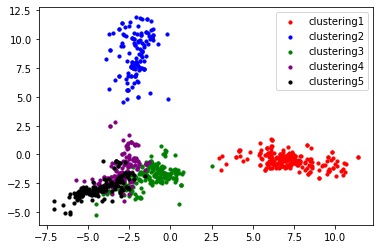

In [87]:
pca = PCA(n_components=2) # 2차원으로 축소
pc = pca.fit_transform(corpus_embeddings)
p_df = pd.DataFrame(data=pc, columns=['main1', 'main2'])
p_df.index=d_df['Cluster_label']

plt.scatter(p_df.iloc[clustering_model.labels_ == 0,0],
            p_df.iloc[clustering_model.labels_ == 0,1], s = 10, c = 'red', label = 'clustering1')
plt.scatter(p_df.iloc[clustering_model.labels_ == 1,0],
            p_df.iloc[clustering_model.labels_ == 1,1], s = 10, c = 'blue', label = 'clustering2')
plt.scatter(p_df.iloc[clustering_model.labels_ == 2,0],
            p_df.iloc[clustering_model.labels_ == 2,1], s = 10, c = 'green', label = 'clustering3')
plt.scatter(p_df.iloc[clustering_model.labels_ == 3,0],
            p_df.iloc[clustering_model.labels_ == 3,1], s = 10, c = 'purple', label = 'clustering4')
plt.scatter(p_df.iloc[clustering_model.labels_ == 4,0],
             p_df.iloc[clustering_model.labels_ == 4,1], s = 10, c = 'black', label = 'clustering5')
# plt.scatter(p_df.iloc[clustering_model.labels_ == 5,0],
#             p_df.iloc[clustering_model.labels_ == 5,1], s = 10, c = 'grey', label = 'clustering6')

plt.legend()
plt.show()

In [90]:
d_df.loc[d_df['Cluster_label2'] == 2]

title       paper         date  \
2                   네이버 인증서 이용자 천만명 돌파…MZ세대가 과반         뉴시스  2021.05.31.   
3                 네이버, 웹소설 공모전 6월 접수 개시…총상금 8억원      edaily  2021.05.31.   
6           한국피앤지, 네이버와 환경보호 기부 기획전...최대 63% 할인         뉴시스  2021.05.31.   
19        믿고 살 수 있는 브랜드 한눈에···네이버, 내달 전용 서비스 론칭        서울경제  2021.05.31.   
24   미국의 패트리온·서브스택처럼…네이버, ‘창작자 주도형’ 구독 플랫폼 실험 중  media KHAN  2021.05.31.   
..                                          ...         ...          ...   
856            네이버·카카오·P2P 사업자, 금감원 감독분담금 의무 부과      디지털타임스  2021.05.19.   
857              네이버파이낸셜, '네이버페이 현장결제' 수수료 전액지원        연합뉴스  2021.05.20.   
858      SC제일은행 "카카오톡·네이버 포스트에서도 웰쓰케어 소식 만나보세요"         뉴스1  2021.05.24.   
859           "라방으로 알뜰폰 가입한다"…SK세븐모바일, 네이버쇼핑 방송        연합뉴스  2021.05.17.   
860             논란의 '네이버 블로그 챌린지' 재개…기존 참여자만 대상         YTN  2021.05.18.   

                                                   url  \
2    https://news.naver.com/main/read.naver?mode=LS...   
3    https://news.naver.com/main/read.naver?mode=LS...   
6    https://news.naver.com/main/read.naver?mode=LS...   
19   https://news.naver.com/main/read.naver?mode=LS...   
24   https://news.naver.com/main/read.naver?mode=LS...   
..                                                 ...   
856  https://news.naver.com/main/read.naver?mode=LS...   
857  https://news.naver.com/main/read.naver?mode=LS...   
858  https://news.naver.com/main/read.naver?mode=LS...   
859  https://news.naver.com/main/read.naver?mode=LS...   
860  https://news.naver.com/main/read.naver?mode=LS...   

                                               content  Cluster_label  \
2    이진영 기자 = 네이버는 네이버 인증서가 MZ세대의 호응에 힘입어 지난주 가입자가 ...              0   
3    네이버는 네이버웹툰이 총 상금 8억원 규모의 ‘2021 네이버웹툰 지상최대공모전’ ...              0   
6    김동현 기자 = 한국피앤지는 네이버 쇼핑라이브와 손잡고 수익금의 일부를 환경 보호를...              0   
19   흩어진 브랜드스토어 한데모아연내 500개社로 입점 확대 목표카카오도 브랜드 전략에 ...              0   
24   글로벌 경제 뉴스, 공연 라이브, 일러스트레이션 등 자신의 취향과 관심사에 따른 콘...              0   
..                                                 ...            ...   
856  금융영역 내 분담금 배분기준     네이버파이낸셜과 카카오페이 등 전자금융업자와 P...              0   
857  정윤주 기자 = 네이버파이낸셜은 신종 코로나바이러스 감염증 장기화로 어려움을 겪는 ...              0   
858  SC제일은행은 웰쓰케어 디지털 채널을 카카오톡과 네이버 포스트 페이지로 확대한다고 ...              0   
859  SK세븐모바일 라이브 방송     채새롬 기자 = SK텔링크는 최근 MZ세대 중심으...              0   
860  ⓒ네이버 블로그 팀네이버가 사흘 만에 조기 종료해 '작심삼일' 비판을 받은 블로그 ...              0   

     Cluster_label2  
2                 2  
3                 2  
6                 2  
19                2  
24                2  
..              ...  
856               2  
857               2  
858               2  
859               2  
860               2  

[212 rows x 7 columns]

In [91]:
# 4개로 클러스터링
# Then, we perform k-means clustering using sklearn:
from sklearn.cluster import KMeans

num_clusters = 4
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['한국-일본-프랑스-미국-동남아\xa0등\xa0AI\xa0연구밸트베트남서\xa0두\xa0번째\xa0AI\xa0연구\xa0거점..산학협력\xa0강화   네이버는 베트남 고등연구기관인 우정통신대학과 인공지능 연구개발 등 산학협력을 진행할 ‘PTIT-네이버 AI 센터’를 세운다고 27일 밝혔다.   앞서 네이버는 지난 3월 하노이과학기술대학과 공동 AI 센터를 세운 데 이어 베트남에서 두 번째 연구 거점을 마련하게 됐다.   이날 베트남 하노이에서 진행된 공동 AI 센터 오픈식에는 베트남디지털통신협회 응우엔 밍 홍 회장, PTIT 드 밍 프엉 이사장, 부 반 산 총장, 당 화이 박 부총장 등 양사 관계자가 참석했다.   PTIT 캠퍼스에 설치된 ‘PTIT-네이버 공동 AI 센터’에서는 베트남 인재들과 네이버 연구진들이 딥러닝, 매핑, 동영상, 음성인식 등 다양한 기술 분야 산학과제를 진행할 예정이다. △실내 이미지 의미 영역 인식 △딥러닝 기반 다양한 물체영역 인식 △딥러닝 기반 비디오 코덱 성능 향상 △딥러닝 기반 적응형 비디오 스트리밍 기술 △베트남어 음성인식 기술 및 데이터 구축 등이 대표적이다.   네이버는 산학과제 진행 단계에 따라 현지 연구 인력을 대상으로 한 글로벌 연수 프로그램, 네이버 엔지니어들의 현지 특강, 인턴십 및 장학금 등 다양한 프로그램들을 지원한다. AI 등 기술 주제와 밀접한 다양한 캠퍼스 행사도 해당 공간에서 수시로 진행될 예정이다.    네이버 로고. 부 반 산 PTIT 총장은 “네이버 산학협력 파트너로서 ‘글로벌 AI 연구 벨트’에 참여할 수 있게 돼 영광”이라며 “PTIT에서 현재 진행 중인 연구활동과 함께 네이버와 적극적 AI 기술 교류는 PTIT 디지털화 과정에 굉장한 힘을 보태며 PTIT의 경쟁력을 더욱 키울 것”이라고 기대감을 전했다.   박동진 네이버 베트남법인장 겸 공동 AI 센터장은 “글로벌 AI 연구소 네이버랩스유럽, 일본에 라인과 야후재팬 간 경영통합, 미국으로 확대된 R&D 조직, KAIST

In [93]:
d_df['Cluster_label3'] = cluster_label

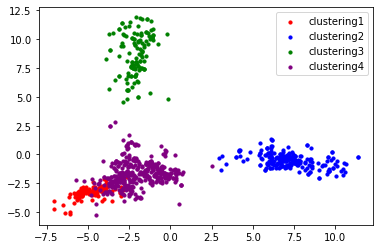

In [94]:
pca = PCA(n_components=2) # 2차원으로 축소
pc = pca.fit_transform(corpus_embeddings)
p_df = pd.DataFrame(data=pc, columns=['main1', 'main2'])
p_df.index=d_df['Cluster_label3']

plt.scatter(p_df.iloc[clustering_model.labels_ == 0,0],
            p_df.iloc[clustering_model.labels_ == 0,1], s = 10, c = 'red', label = 'clustering1')
plt.scatter(p_df.iloc[clustering_model.labels_ == 1,0],
            p_df.iloc[clustering_model.labels_ == 1,1], s = 10, c = 'blue', label = 'clustering2')
plt.scatter(p_df.iloc[clustering_model.labels_ == 2,0],
            p_df.iloc[clustering_model.labels_ == 2,1], s = 10, c = 'green', label = 'clustering3')
plt.scatter(p_df.iloc[clustering_model.labels_ == 3,0],
            p_df.iloc[clustering_model.labels_ == 3,1], s = 10, c = 'purple', label = 'clustering4')
# plt.scatter(p_df.iloc[clustering_model.labels_ == 4,0],
#              p_df.iloc[clustering_model.labels_ == 4,1], s = 10, c = 'black', label = 'clustering5')
# plt.scatter(p_df.iloc[clustering_model.labels_ == 5,0],
#             p_df.iloc[clustering_model.labels_ == 5,1], s = 10, c = 'grey', label = 'clustering6')

plt.legend()
plt.show()

In [99]:
d_df.loc[d_df['Cluster_label'] == 1]

title                   paper  \
5            “아빠 사랑해” 카톡 프로필 영정, 네이버 로비에 놓이다  The Internet Hankyoreh   
8         네이버 개발자 죽음의 증언…IT업계선 "바닥 좁고 학연 세다"               Joins.com   
12   네이버·카카오 조직문화 '빨간불'…"치열한 경쟁·평가원칙 부재가 초래"                     뉴시스   
15            네이버 직원들, 직원 사망 관련 검은 복장·헌화로 추모                     KBS   
16    네이버 직원 극단선택 사건 '리스크 관리위'가 담당…노조는 별도 조사                     뉴스1   
..                                       ...                     ...   
672       네이버 직원 극단 선택... '업무 스트레스 호소' 메모 남겨                    한국일보   
712          네이버 직원 극단 선택…노조 "위계에 의한 괴롭힘 겪어"             inews24.com   
726        "엎드려 뻗쳐 직장상사" 네이버 40대 男 직원, 극단 선택             inews24.com   
734                 한성숙 네이버 대표 "사안 무겁게 받아들여"                 SBS Biz   
768                네이버 직원, 극단적 선택…업무 스트레스 호소                    문화일보   

            date                                                url  \
5    2021.05.31.  https://news.naver.com/main/read.naver?mode=LS...   
8    2021.05.31.  https://news.naver.com/main/read.naver?mode=LS...   
12   2021.05.31.  https://news.naver.com/main/read.naver?mode=LS...   
15   2021.05.31.  https://news.naver.com/main/read.naver?mode=LS...   
16   2021.05.31.  https://news.naver.com/main/read.naver?mode=LS...   
..           ...                                                ...   
672  2021.05.28.  https://news.naver.com/main/read.naver?mode=LS...   
712  2021.05.28.  https://news.naver.com/main/read.naver?mode=LS...   
726  2021.05.28.  https://news.naver.com/main/read.naver?mode=LS...   
734  2021.05.28.  https://news.naver.com/main/read.naver?mode=LS...   
768  2021.05.28.  https://news.naver.com/main/read.naver?mode=LS...   

                                               content  Cluster_label  \
5    1층 추모 공간에 흰 국화 쌓이기 시작…퀵으로 도착하는 꽃도 보여“주말 내내 먹먹”...              1   
8    경기도 성남시 네이버 본사 그린팩토리        네이버 본사 직원이 업무상 괴로움...              1   
12   ▲네이버 이해진 글로벌투자책임자와 카카오 김범수 의장 이진영 기자 = 고액 연봉과 ...              1   
15   네이버 직원 사망과 관련해 본사에 추모 장소가 마련된 가운데 오늘 오전부터 직원들의...              1   
16   노조 "사측에 출입·업무기록 등 데이터 보존 촉구"경기도 성남시 네이버 그린팩토리 ...              1   
..                                                 ...            ...   
672  경찰, 직장 상사 갑질·사측 방관 여부 조사지난달 25일 오전 경기 성남시 네이버 ...              1   
712  네이버 직원이 극단의 선택을 해 경찰이 조사에 나섰다.   네이버 노조가 40대 한...              1   
726  네이버 직원이 극단의 선택을 해 경찰이 조사에 나섰다.   네이버 본사에 근무하던 ...              1   
734  네이버 직원이 극단적 선택을 한 가운데 한성숙 네이버 대표가 "객관적인 조사를 받는...              1   
768  네이버 본사에 근무하던 40대 직원이 극단적 선택을 한 사실이 드러나 경찰이 수사에...              1   

     Cluster_label2  Cluster_label3  
5                 1               2  
8                 1               2  
12                1               2  
15                1               2  
16                1               2  
..              ...             ...  
672               1               2  
712               1               2  
726               1               2  
734               1               2  
768               1               2  

[131 rows x 8 columns]

In [100]:
tmp_df = d_df.loc[d_df['Cluster_label'] == 1]

In [101]:
tmp_df = tmp_df[['title', 'date', 'content']]

In [103]:
tmp_df.reset_index(inplace=True)
tmp_df.drop(columns='index', axis=1, inplace=True)

In [104]:
tmp_df

title         date  \
0            “아빠 사랑해” 카톡 프로필 영정, 네이버 로비에 놓이다  2021.05.31.   
1         네이버 개발자 죽음의 증언…IT업계선 "바닥 좁고 학연 세다"  2021.05.31.   
2    네이버·카카오 조직문화 '빨간불'…"치열한 경쟁·평가원칙 부재가 초래"  2021.05.31.   
3             네이버 직원들, 직원 사망 관련 검은 복장·헌화로 추모  2021.05.31.   
4     네이버 직원 극단선택 사건 '리스크 관리위'가 담당…노조는 별도 조사  2021.05.31.   
..                                       ...          ...   
126       네이버 직원 극단 선택... '업무 스트레스 호소' 메모 남겨  2021.05.28.   
127          네이버 직원 극단 선택…노조 "위계에 의한 괴롭힘 겪어"  2021.05.28.   
128        "엎드려 뻗쳐 직장상사" 네이버 40대 男 직원, 극단 선택  2021.05.28.   
129                 한성숙 네이버 대표 "사안 무겁게 받아들여"  2021.05.28.   
130                네이버 직원, 극단적 선택…업무 스트레스 호소  2021.05.28.   

                                               content  
0    1층 추모 공간에 흰 국화 쌓이기 시작…퀵으로 도착하는 꽃도 보여“주말 내내 먹먹”...  
1    경기도 성남시 네이버 본사 그린팩토리        네이버 본사 직원이 업무상 괴로움...  
2    ▲네이버 이해진 글로벌투자책임자와 카카오 김범수 의장 이진영 기자 = 고액 연봉과 ...  
3    네이버 직원 사망과 관련해 본사에 추모 장소가 마련된 가운데 오늘 오전부터 직원들의...  
4    노조 "사측에 출입·업무기록 등 데이터 보존 촉구"경기도 성남시 네이버 그린팩토리 ...  
..                                                 ...  
126  경찰, 직장 상사 갑질·사측 방관 여부 조사지난달 25일 오전 경기 성남시 네이버 ...  
127  네이버 직원이 극단의 선택을 해 경찰이 조사에 나섰다.   네이버 노조가 40대 한...  
128  네이버 직원이 극단의 선택을 해 경찰이 조사에 나섰다.   네이버 본사에 근무하던 ...  
129  네이버 직원이 극단적 선택을 한 가운데 한성숙 네이버 대표가 "객관적인 조사를 받는...  
130  네이버 본사에 근무하던 40대 직원이 극단적 선택을 한 사실이 드러나 경찰이 수사에...  

[131 rows x 3 columns]

In [106]:
tmp_df['content'] = [re.sub('[^가-힣]', ' ', s) for s in tmp_df['content']]

In [110]:
documents = []
for i in range(len(tmp_df)):
    documents.append(tmp_df['content'][i])

In [111]:
topics, probs = model.fit_transform(documents)

In [112]:
model.visualize_topics()

In [113]:
model.visualize_distribution(probs[0])

In [114]:
for i in range(0, 5):
  print(i,'번째 토픽 :', model.get_topic(i))

0 번째 토픽 : [('네이버', 0.06415796293513903), ('조사', 0.05700992164400942), ('업무', 0.05267275437433452), ('으로', 0.05204778796230807), ('노조', 0.0426949411917984), ('회사', 0.040775060799284855), ('에서', 0.03943838282613772), ('기록', 0.036666793184129146), ('데이터', 0.03435900490778577), ('직원', 0.03151204590029389)]
1 번째 토픽 : [('직장', 0.06280219191874642), ('으로', 0.060932088436838415), ('에서', 0.060222156638426255), ('네이버', 0.05888549990352502), ('경찰', 0.056731559710740315), ('직원', 0.052345332982636494), ('습니다', 0.04955700197121211), ('발견', 0.04891125498166111), ('전화', 0.0459682031251275), ('메모', 0.03990993977684602)]
2 번째 토픽 : [('네이버', 0.06086443197090427), ('조사', 0.060004544875224566), ('으로', 0.05712415219145264), ('이번', 0.05103340090978258), ('대표', 0.04835803879995195), ('에서', 0.04538315100937813), ('객관', 0.0409561501391278), ('라고', 0.039346245945598664), ('상황', 0.03870766313687344), ('직장', 0.038295543509921454)]
3 번째 토픽 : [('으로', 0.05871678388466585), ('네이버', 0.053726618620985635), ('직장', 0.045371